### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
from tensorflow import keras

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную модель для прогнозирования цен на жилье в США на основе различных факторов.


### Загрузка данных

In [9]:
df = pd.read_csv('USA_Housing (1).csv')

In [10]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   str    
dtypes: float64(6), str(1)
memory usage: 273.6 KB


In [12]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)


In [14]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


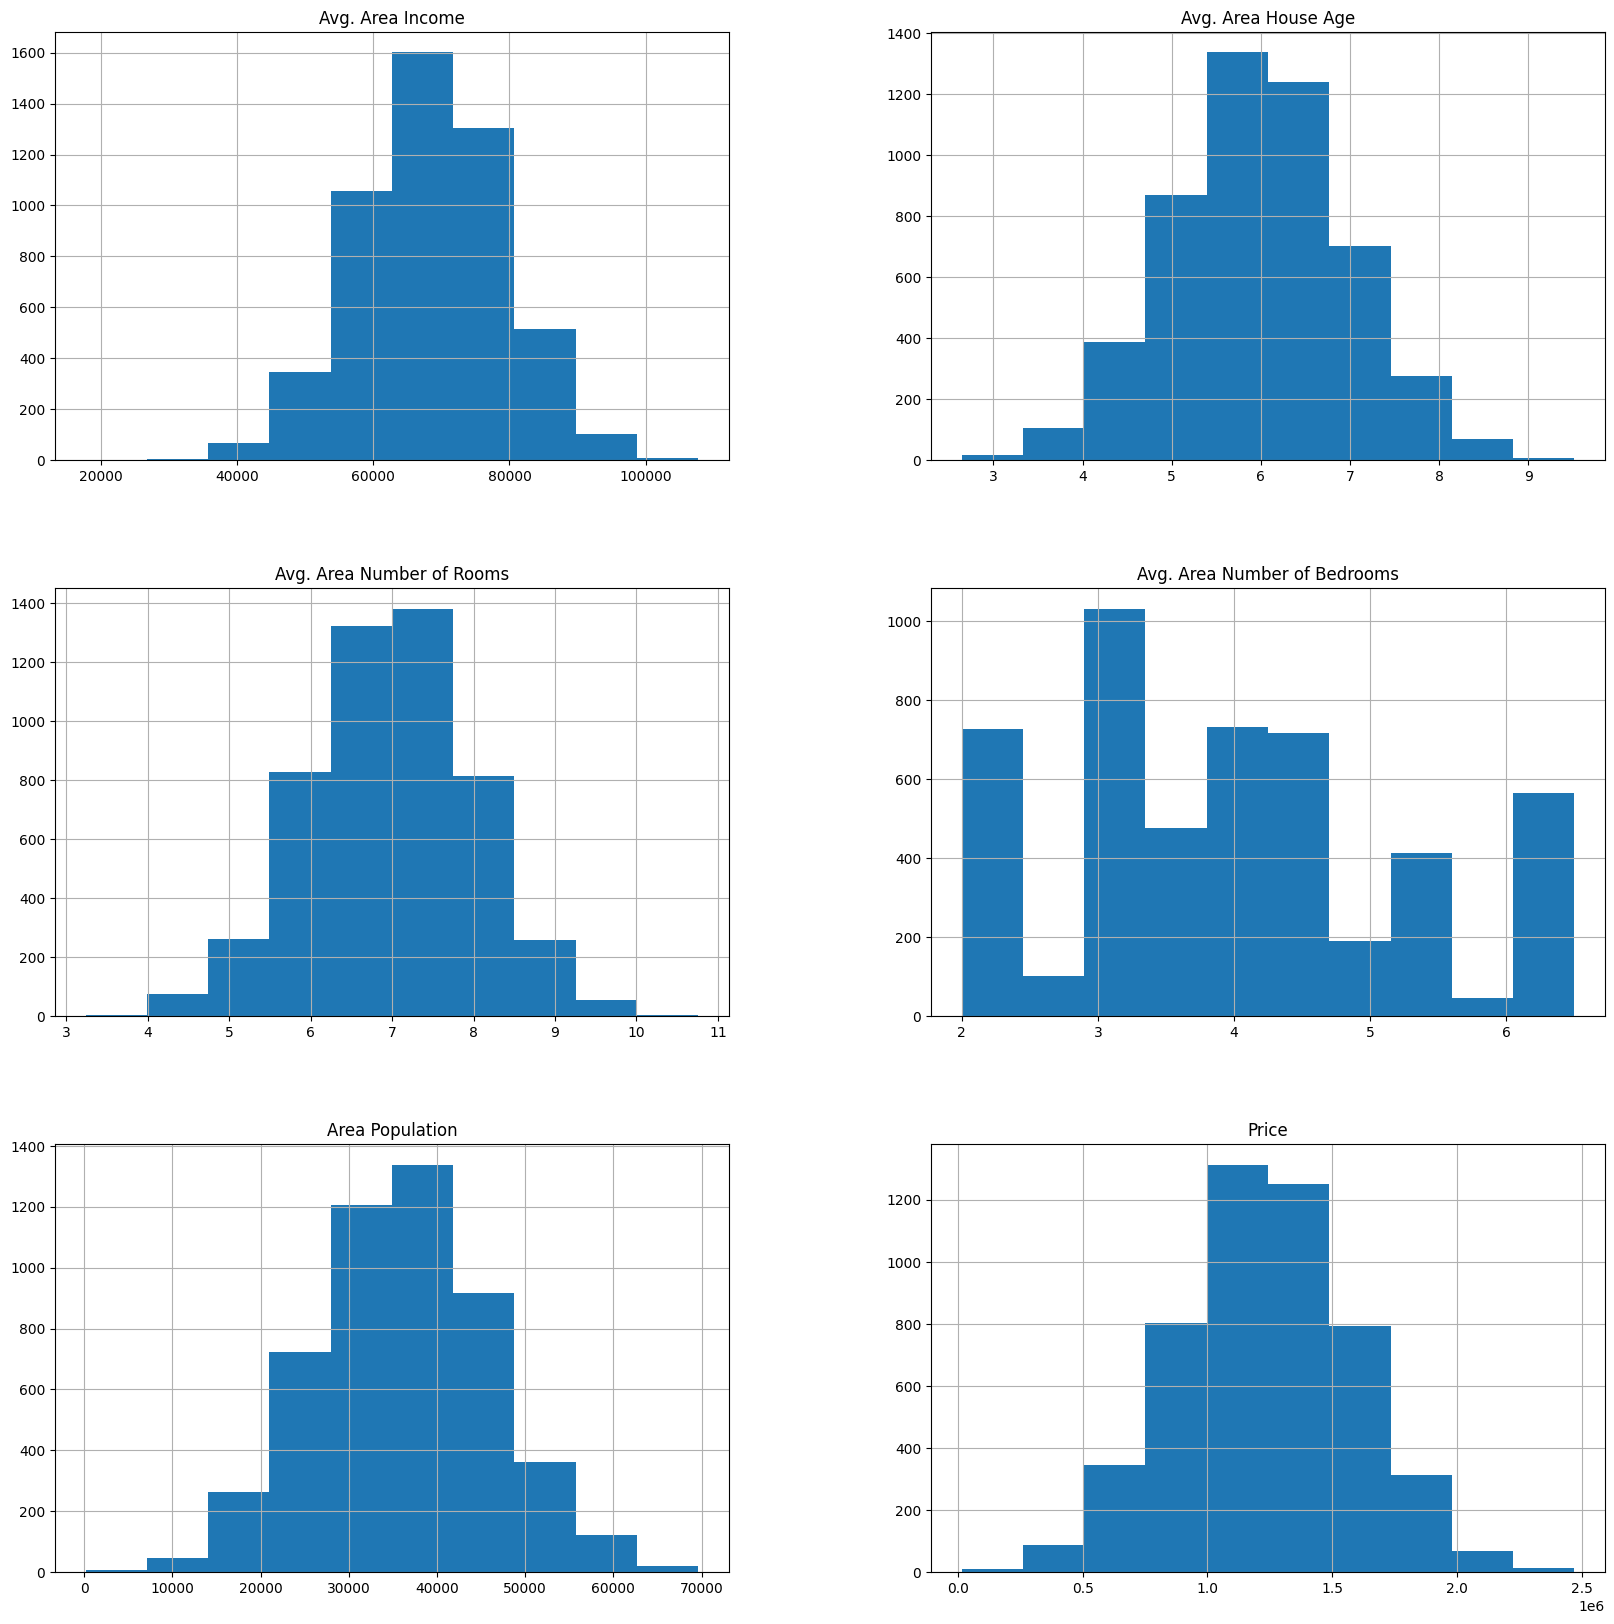

In [15]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

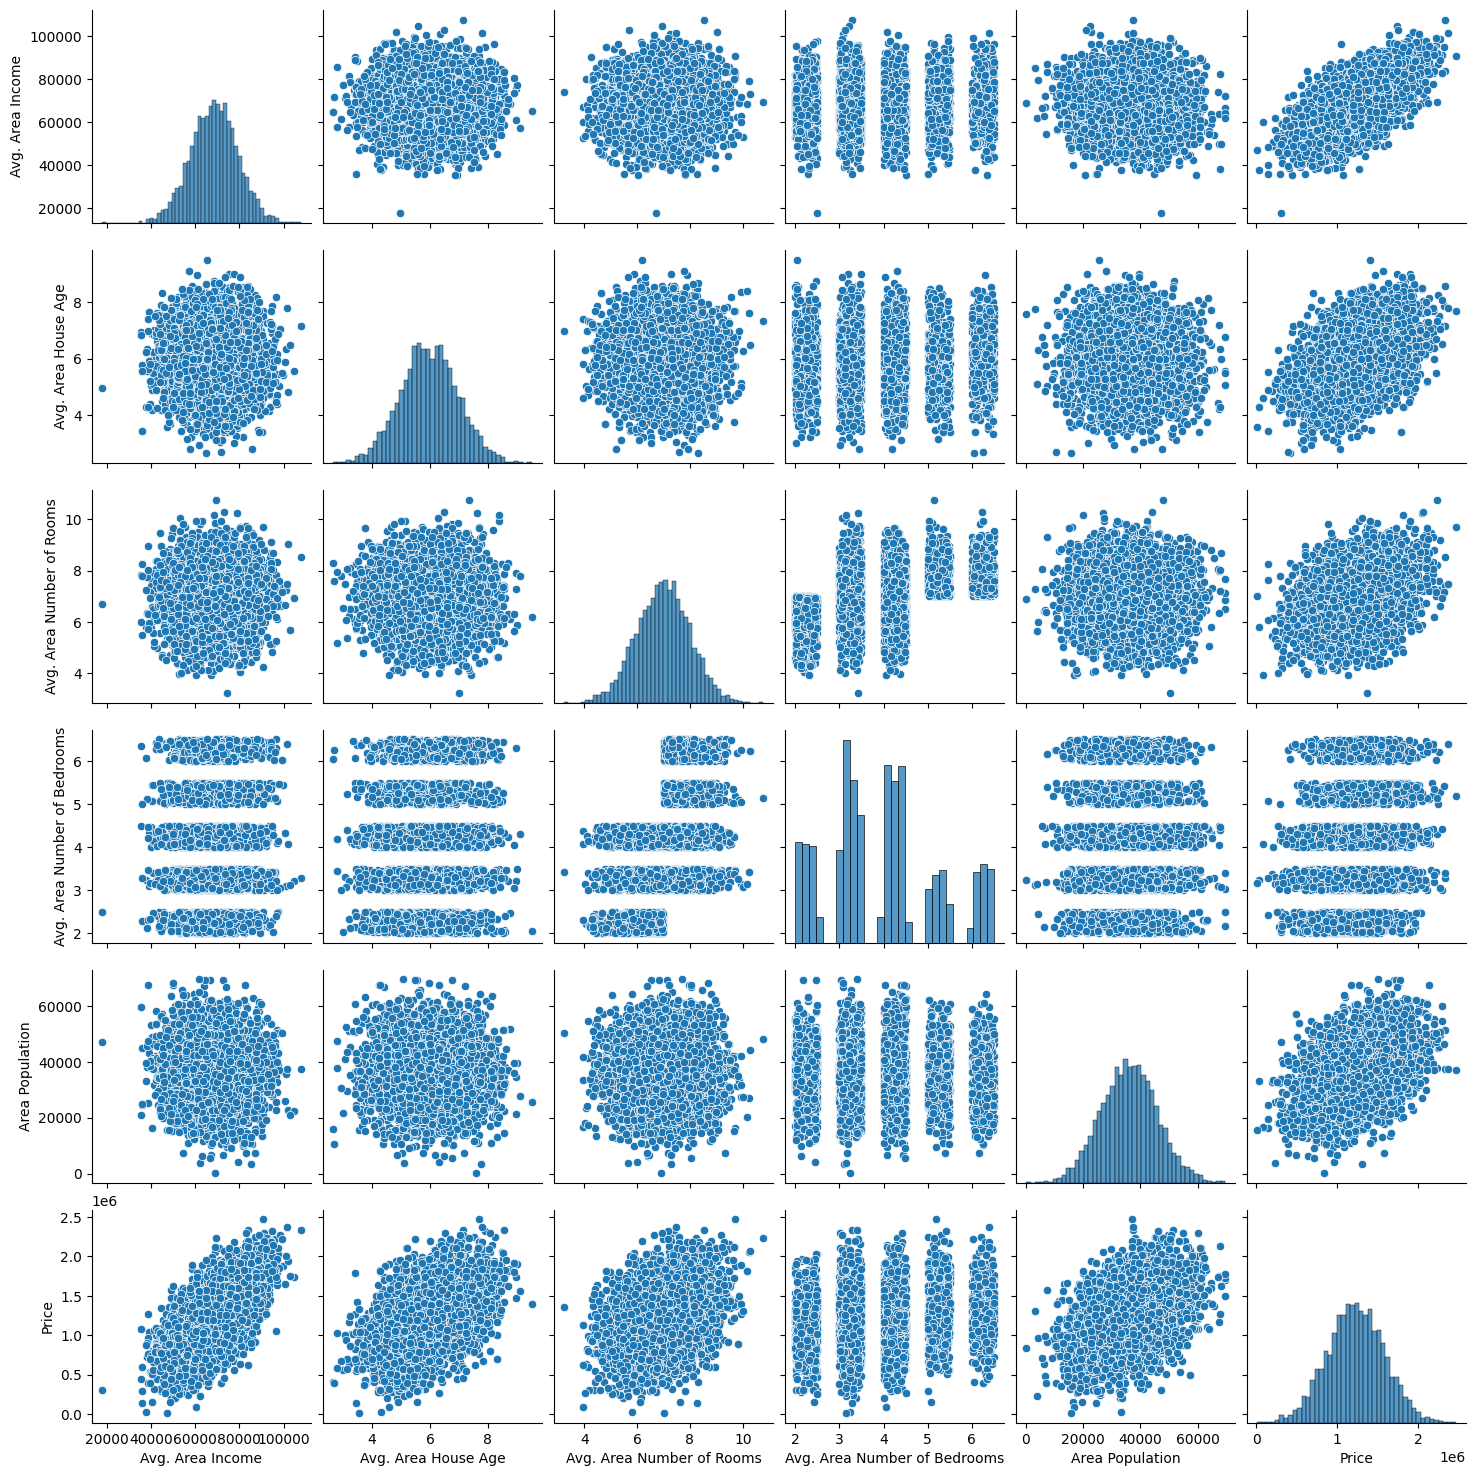

In [16]:
plt.figure(figsize=(8,6))
sns.pairplot(df)
plt.show()


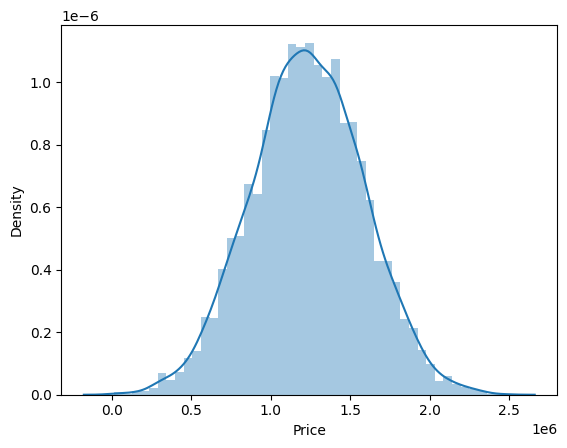

In [17]:
sns.distplot(df['Price'])
plt.show()

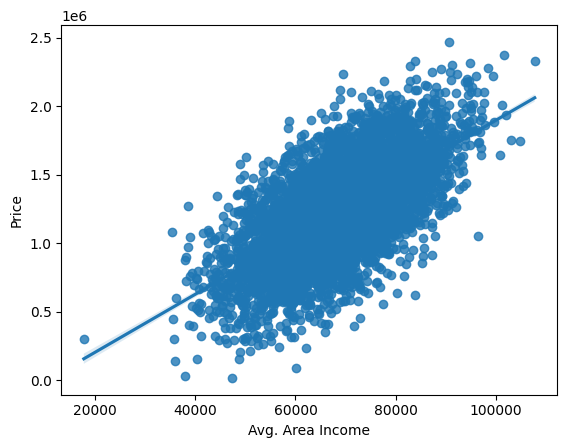

In [18]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)
plt.show()

In [19]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


<Axes: >

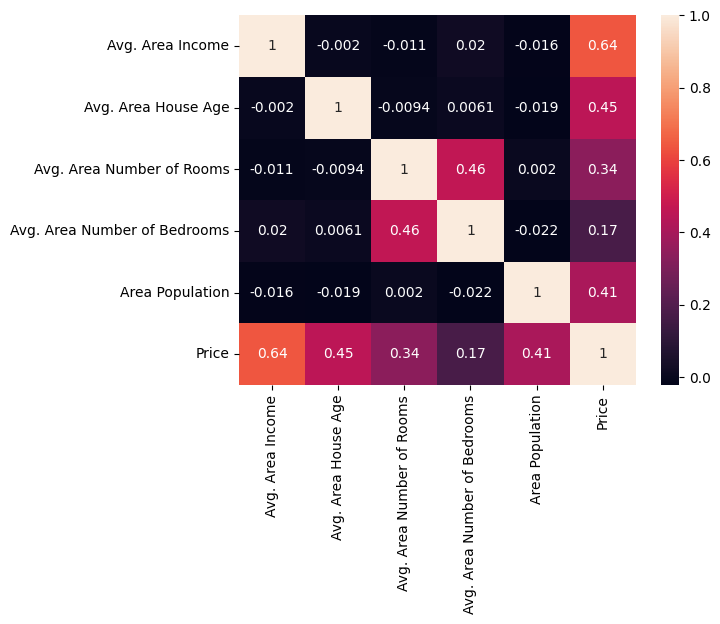

In [20]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [21]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

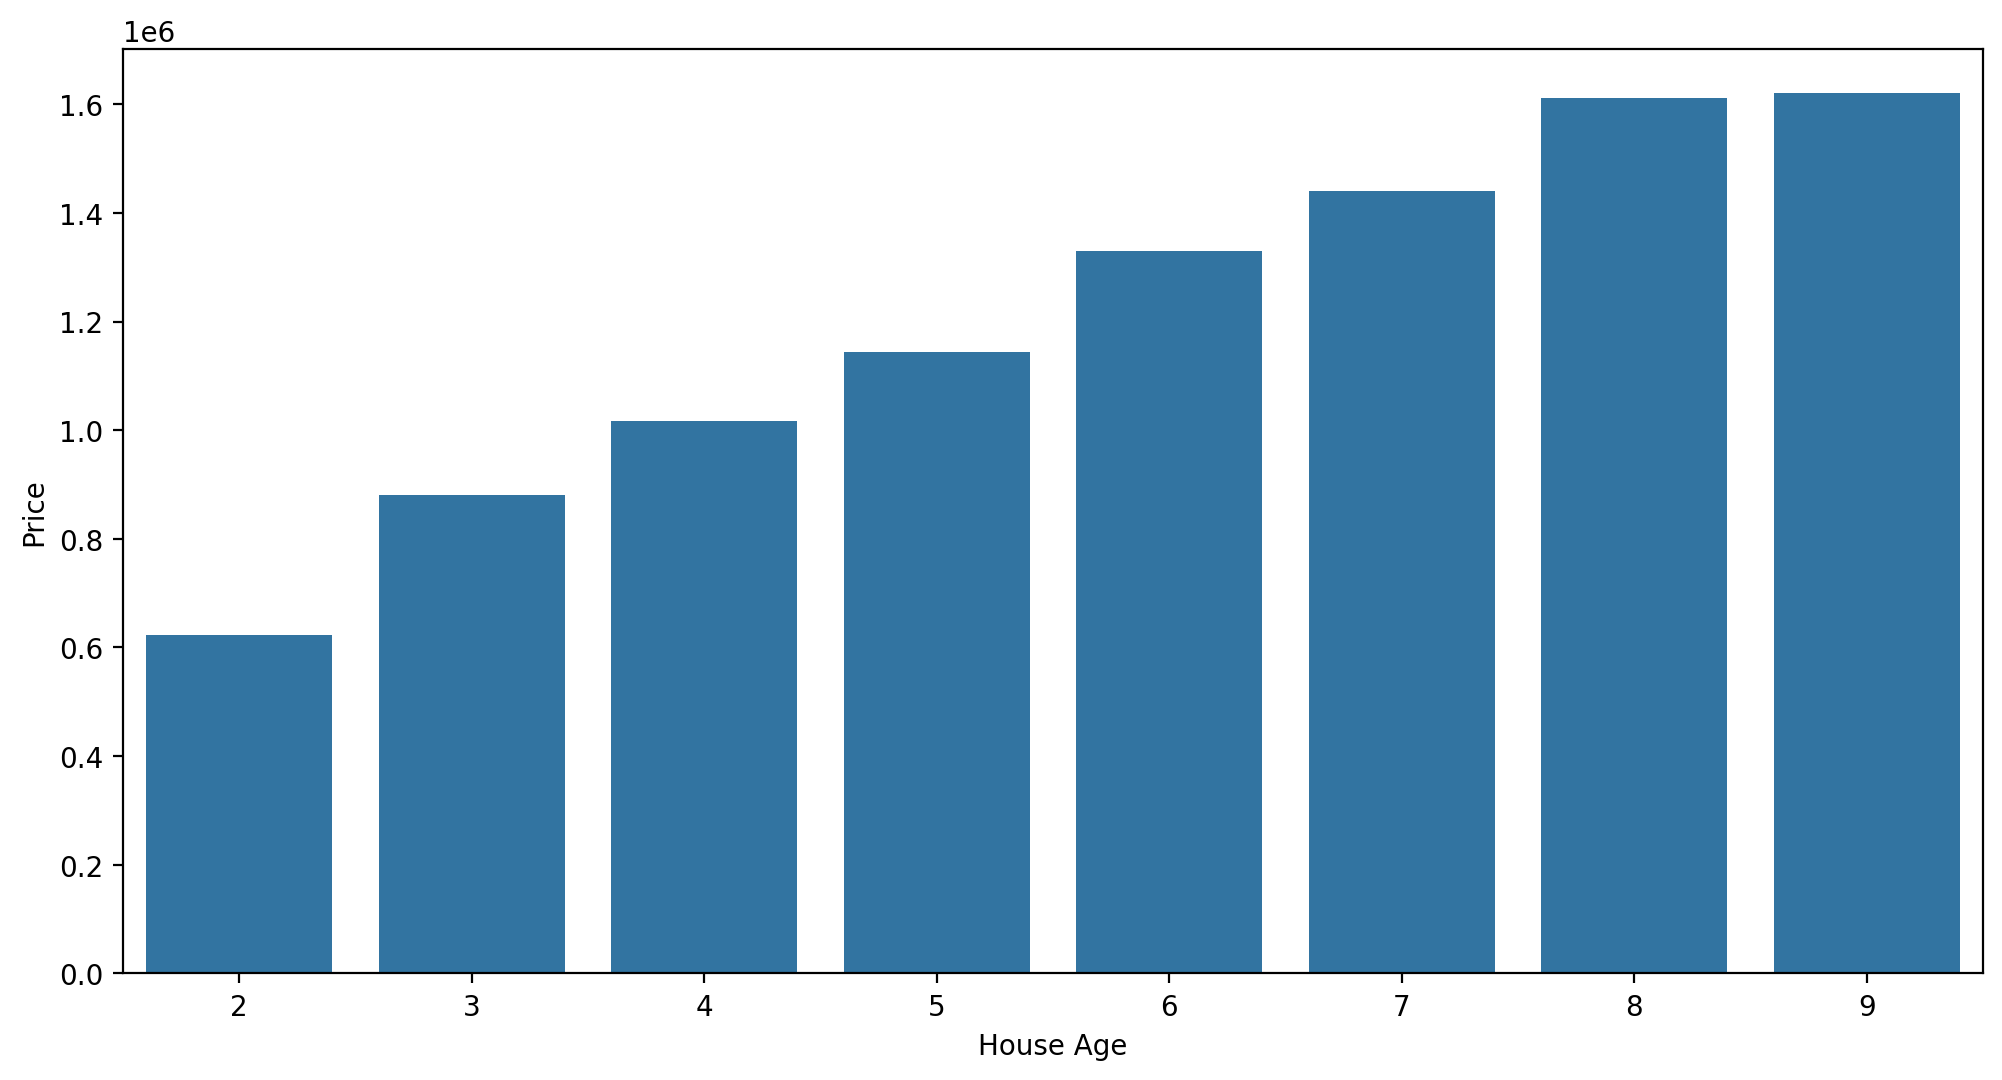

In [22]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [23]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

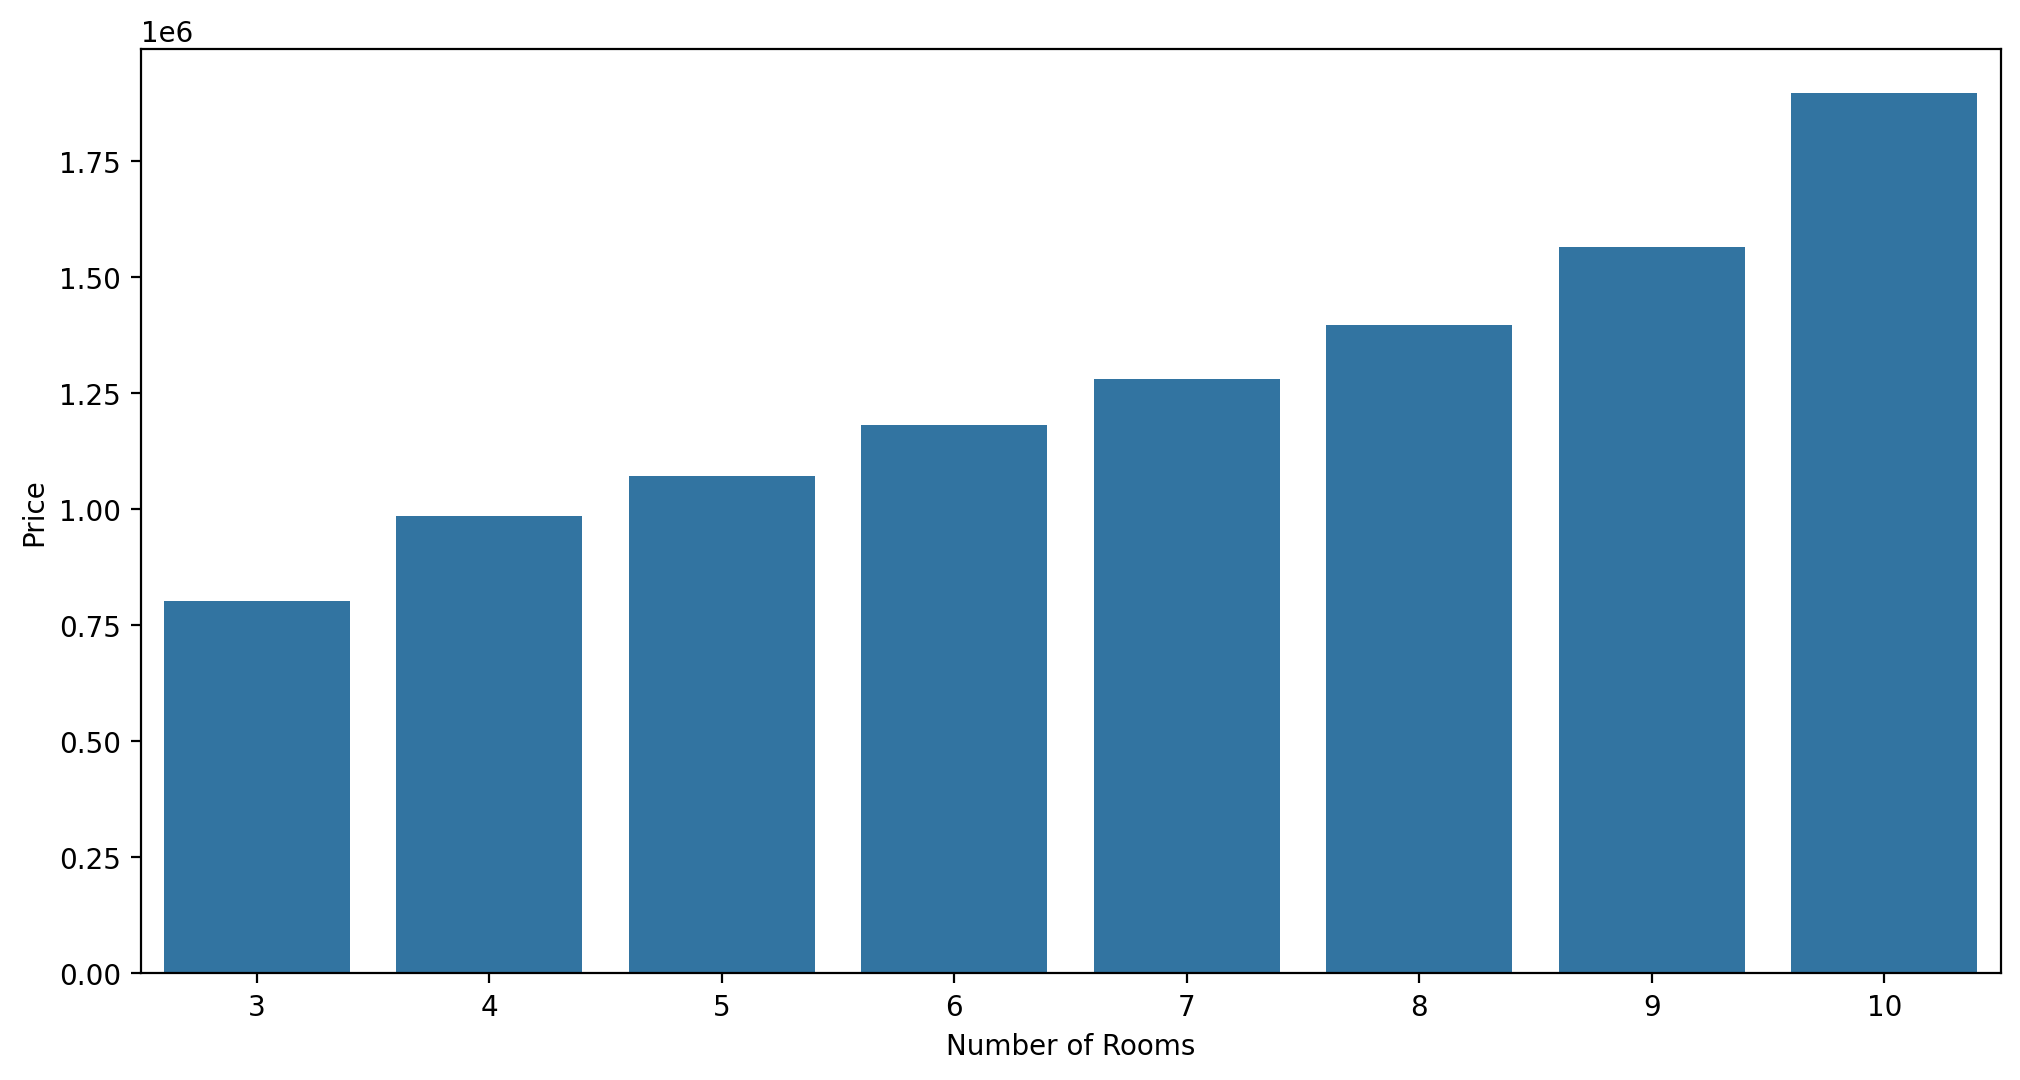

In [24]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [25]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

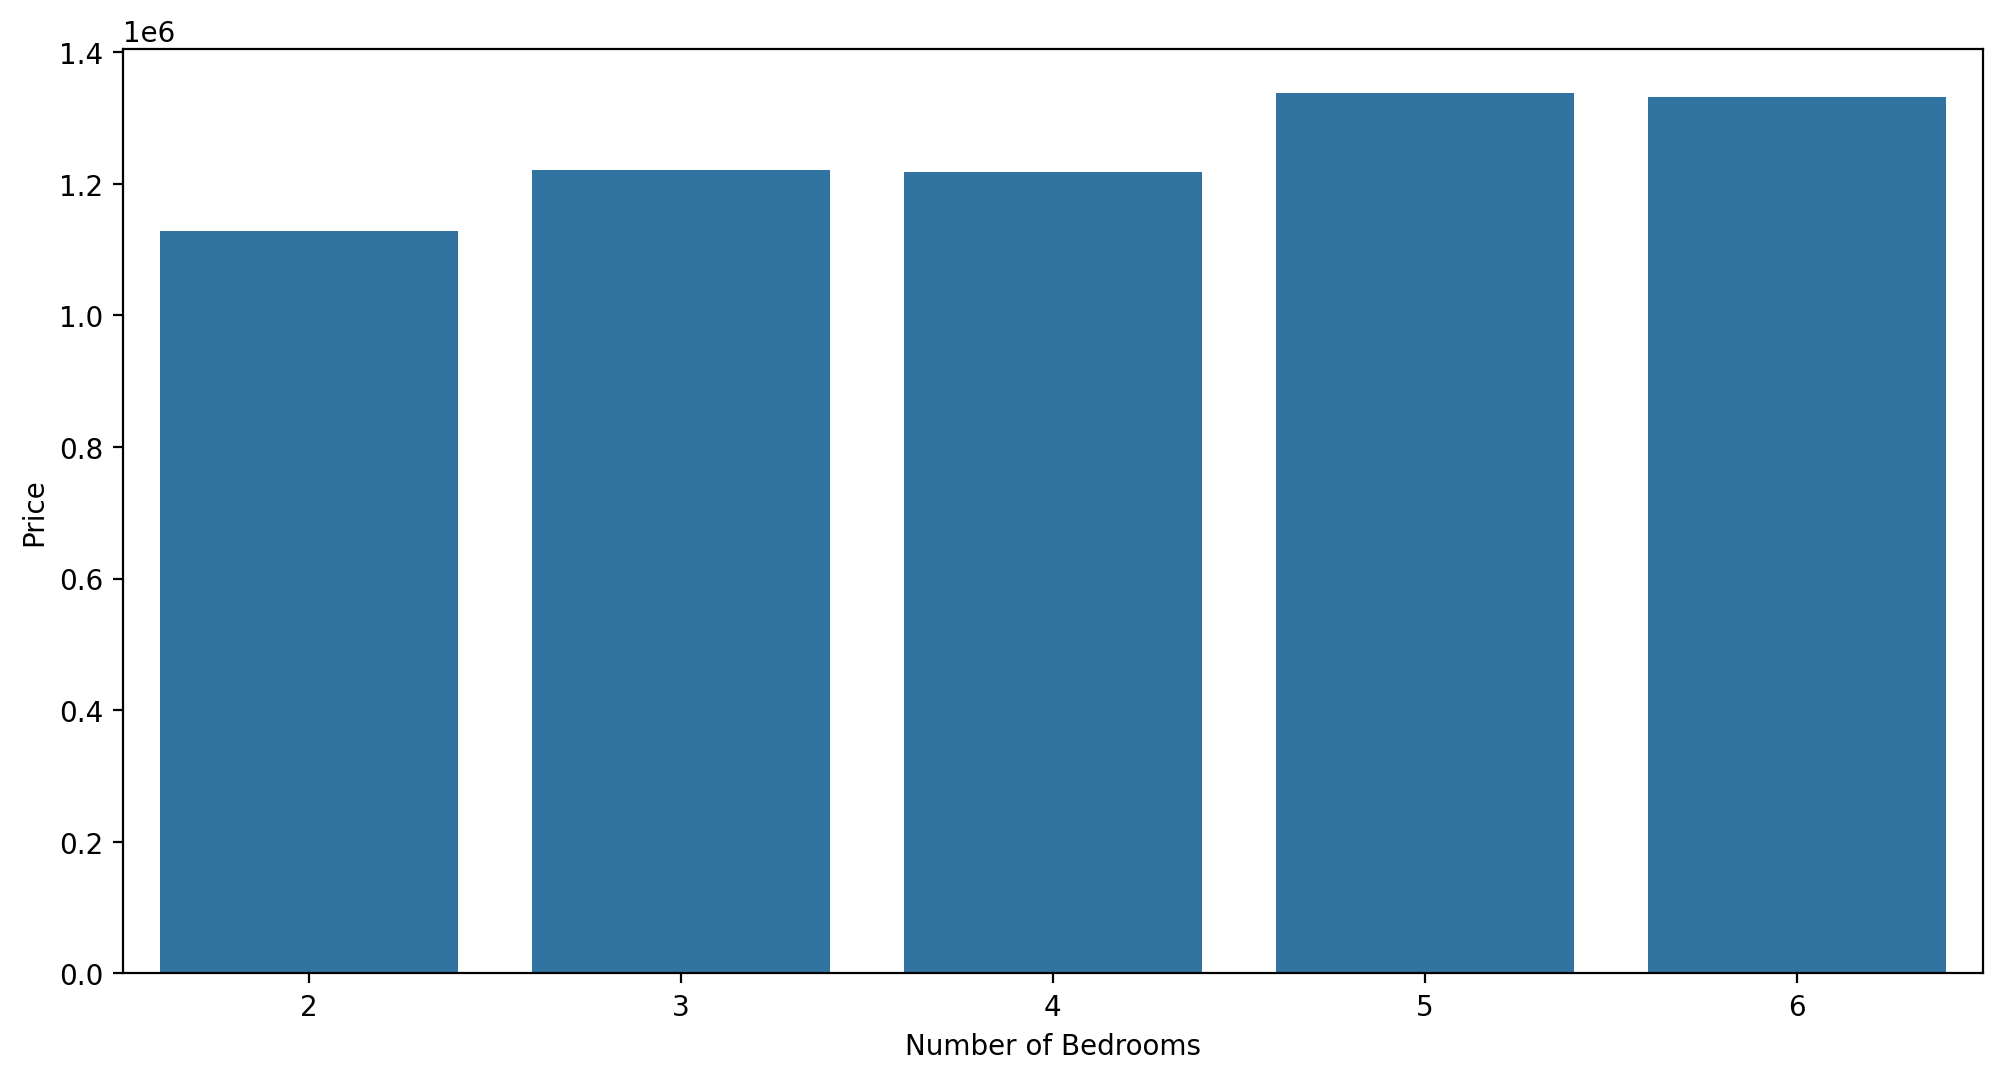

In [26]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Обучение модели линейной регрессии

In [27]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='str')

In [28]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [29]:

y = df['Price']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [35]:
lrm.intercept_

np.float64(-2638673.426190169)

In [36]:
lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [37]:
predictions = lrm.predict(X_test)

In [38]:
predictions

array([1308536.13592596, 1237122.72746454, 1243835.62817087, ...,
       1457119.79297217, 1483428.95309281, 1047510.59737215],
      shape=(1500,))

In [39]:
y_test.round(3)

1501   1339096.0770
2586   1251794.1790
2653   1340094.9660
1055   1431507.6230
705    1042373.5240
           ...     
3563   1348221.7650
1538   1309937.3990
1837   1472887.2470
2380   1409762.1190
1912   1009606.2840
Name: Price, Length: 1500, dtype: float64

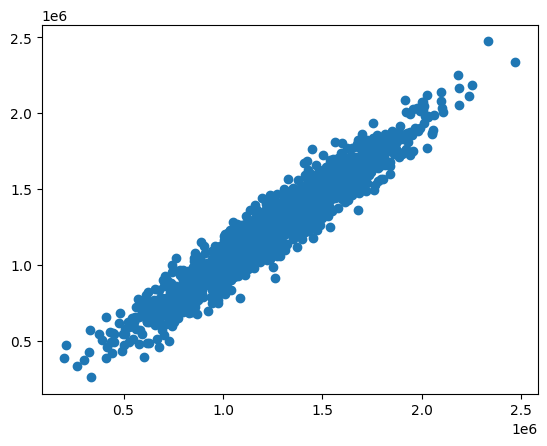

In [40]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

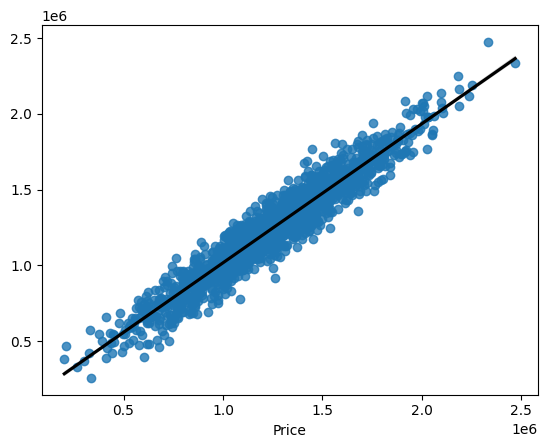

In [41]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

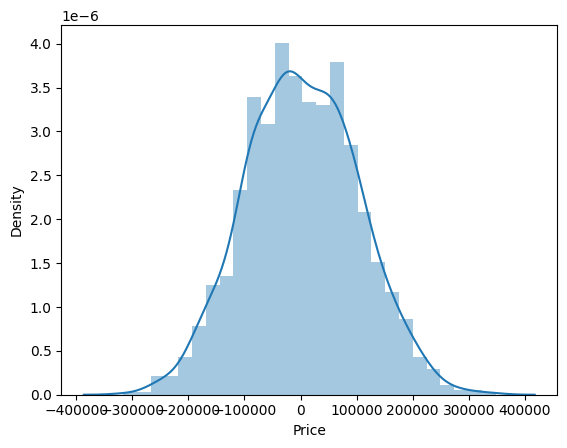

In [42]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [43]:
from sklearn import metrics

In [44]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336873

In [45]:
metrics.mean_squared_error(y_test, predictions)

10068422551.400822

In [46]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(100341.52954485407)

In [47]:
metrics.r2_score(y_test, predictions)

0.9146818498754021

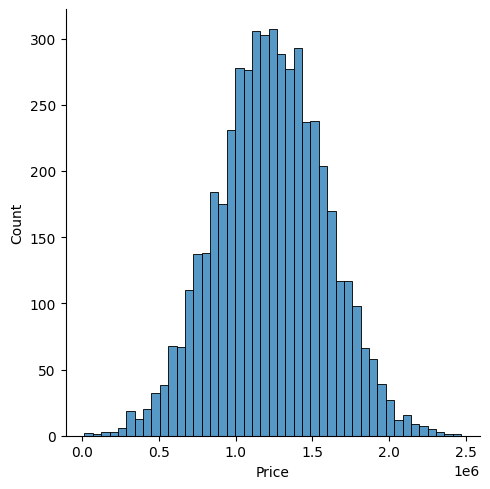

In [48]:
sns.displot(df['Price'])

<Axes: >

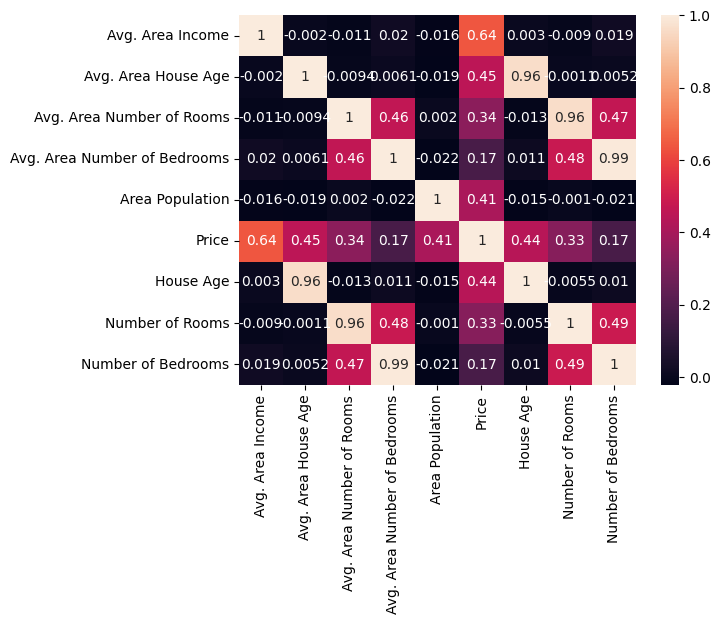

In [49]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)

### Подготовка данных

In [50]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

### Обучение нейронной сети

In [52]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

# Модель
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Выходной слой для регрессии
])

# Компиляция
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)

# Краткий обзор модели
model.summary()

# Callback для ранней остановки
early_stop = EarlyStopping(
    monitor='val_loss',  # следим за потерями на валидации
    patience=10,         # остановка после 10 эпох без улучшения
    restore_best_weights=True
)

# Обучение модели
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1635322036224.0000 - mae: 1228049.2500 - mse: 1635322036224.0000 - val_loss: 1638467108864.0000 - val_mae: 1228819.0000 - val_mse: 1638467108864.0000
Epoch 2/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 1635255713792.0000 - mae: 1228024.0000 - mse: 1635255713792.0000 - val_loss: 1638384664576.0000 - val_mae: 1228785.1250 - val_mse: 1638384664576.0000
Epoch 3/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1635049799680.0000 - mae: 1227942.5000 - mse: 1635049799680.0000 - val_loss: 1638099976192.0000 - val_mae: 1228672.3750 - val_mse: 1638099976192.0000
Epoch 4/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1634573221888.0000 - mae: 1227751.3750 - mse: 1634573221888.0000 - val_loss: 1637252857856.0000 - val_mae: 1228336.1250 - val_mse: 1637252857856.0000
Epoch 5/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1633713651712.0000 - mae: 1227414.2500 - mse: 1633713651712.0000 - val_loss: 1636202708992.0000 - val

In [53]:
def plot_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    axes[0].plot(history.history['loss'], label='Train Loss')
    axes[0].plot(history.history['val_loss'], label='Val Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss (MSE)')
    axes[0].legend()
    axes[0].grid(True)
    
    axes[1].plot(history.history['mae'], label='Train MAE')
    axes[1].plot(history.history['val_mae'], label='Val MAE')
    axes[1].set_title('Model MAE')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('MAE')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

In [54]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 901225775104.0000 - mae: 917113.1875 - mse: 901225775104.0000 - val_loss: 15440185131008.0000 - val_mae: 3882549.5000 - val_mse: 15440185131008.0000
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 697200738304.0000 - mae: 826470.1250 - mse: 697200738304.0000 - val_loss: 5190090489856.0000 - val_mae: 2104361.2500 - val_mse: 5190090489856.0000
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 600062754816.0000 - mae: 767600.1875 - mse: 600062754816.0000 - val_loss: 638960140288.0000 - val_mae: 684990.5625 - val_mse: 638960140288.0000
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 535719870464.0000 - mae: 725581.6875 - mse: 535719870464.0000 - val_loss: 403057704960.0000 - val_mae: 624724.5625 - val_mse: 403057704960.0000
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 482225356800.0000 - mae: 688588.4375 - mse: 482225356800.0000 - val_loss: 395546722304.0000 - val_mae: 62

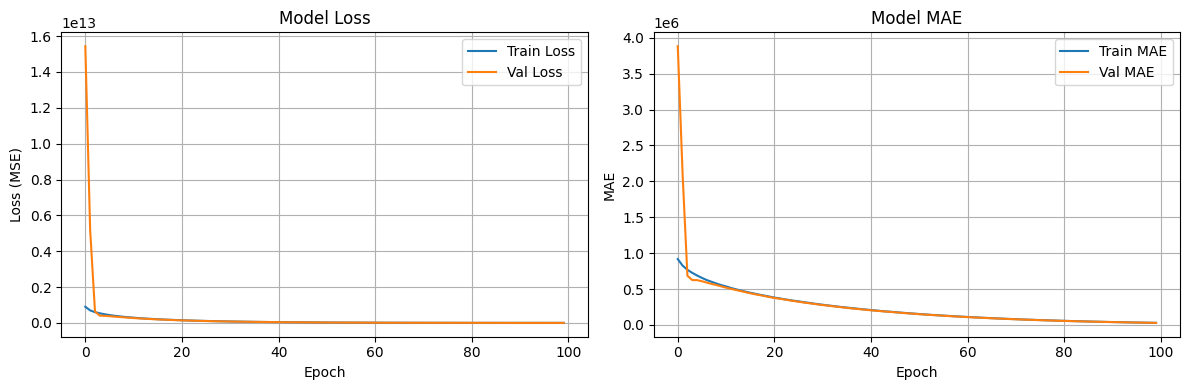

In [55]:
plot_history(history)